In [23]:
# K-NN 알고리즘은 가장 간단한 머신러닝 알고리즘입니다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부입니다.
# 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다.

In [36]:
# 라이브러리 불러오기
import mglearn
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


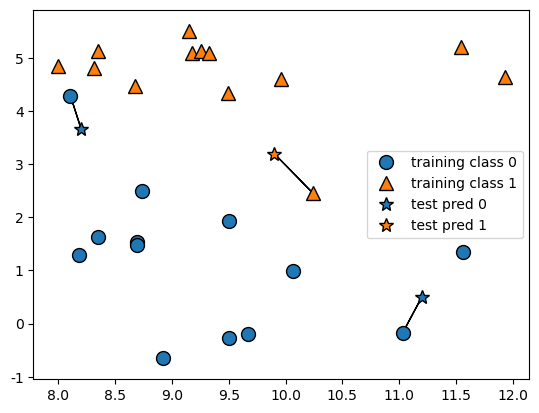

In [26]:
# mglearn의 forge dataset을 통한 분류
mglearn.plots.plot_knn_classification(n_neighbors = 1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [29]:
# KNeighborsClassifier를 import하고 객체를 만듭니다.

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
# 훈련세트를 사용하여 분류모델을 학습시킵니다. 
# KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것을 의미합니다.
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# predict 메서드를 호출해서 예측합니다
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [32]:
# 모델 평가
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

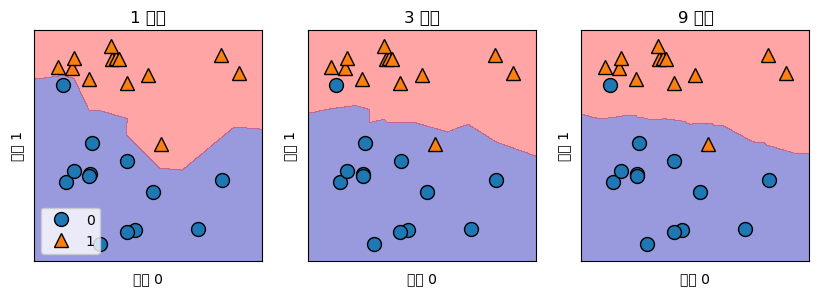

In [39]:
# 결정 경계 그리기 - 이웃의 수를 늘릴 수록 결정 경계가 부드러워집니다.

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  
  # fit method는 self object를 리턴합니다
  # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [41]:
# 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지를 살펴봅니다.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

# 1에서 1-까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  func(*args, **kwargs)
/Users/jihye/opt

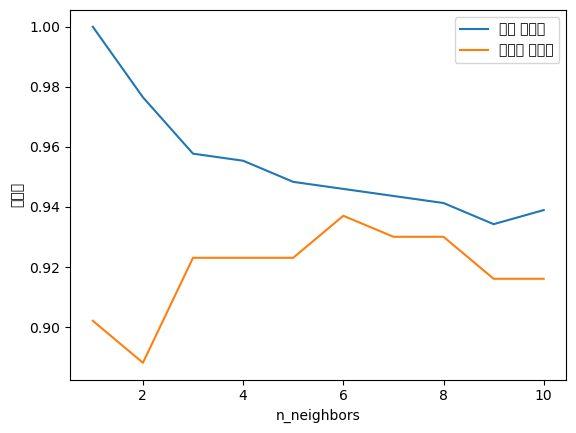

In [43]:
for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()